# Jobsheet 02 - Regression

Isikan identitas berikut
NIM: 2241727018
Nama: Laudry Iza Fadian
Kelas:

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [27]:
# import package
import numpy as np
import pandas as pd

In [28]:
# baca data
data = pd.read_csv('dataset_pengujian_pcr_harian.csv')
data.head()

,tanggal,positif,negatif,inconclusive,jumlah_sampel
0,7/15/2020 0:00,53,640,1,694
1,7/16/2020 0:00,36,1033,0,1069
2,7/17/2020 0:00,60,685,1,746
3,7/18/2020 0:00,54,1830,0,1884
4,7/19/2020 0:00,3,531,15,549


In [29]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tanggal        787 non-null    object
 1   positif        787 non-null    int64 
 2   negatif        787 non-null    int64 
 3   inconclusive   787 non-null    int64 
 4   jumlah_sampel  787 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 30.9+ KB


,positif,negatif,inconclusive,jumlah_sampel
count,787.000000,787.000000,787.000000,787.000000
mean,1698.597205,4547.498094,13.360864,6259.456163
std,2620.648147,3325.877693,20.104989,5522.305645
min,-262.000000,121.000000,-27.000000,155.000000
25%,140.000000,2152.500000,1.000000,2648.000000
50%,648.000000,3670.000000,5.000000,4871.000000
75%,2003.500000,6043.000000,18.000000,7734.500000
max,14661.000000,18773.000000,114.000000,32627.000000


### Visualisasi Data

In [30]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

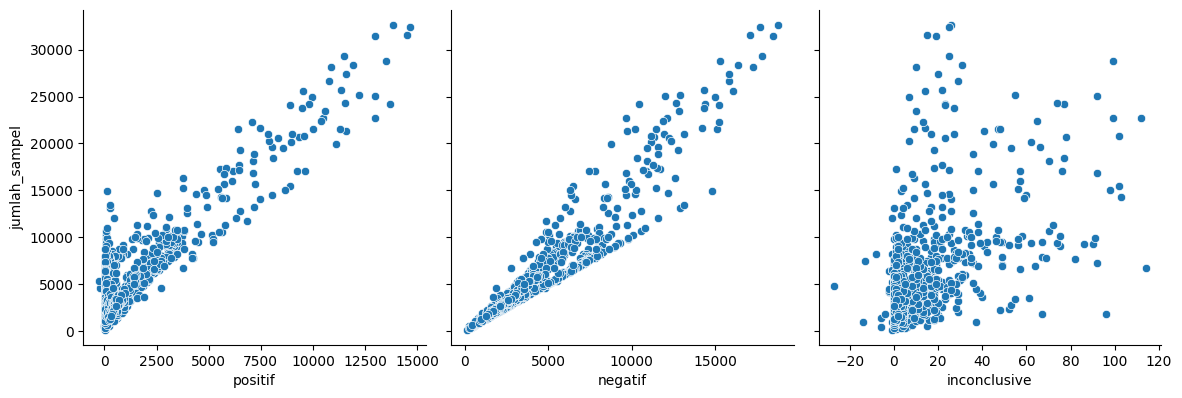

In [31]:
# operasi visualisasi
sns.pairplot(data, x_vars=['positif', 'negatif','inconclusive'], 
             y_vars='jumlah_sampel', height=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

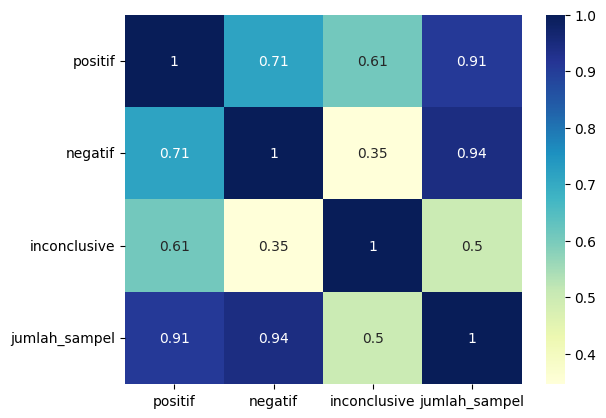

In [32]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [33]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['inconclusive']
y = data['jumlah_sampel']

In [34]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [35]:
# hasil training dtaset
X_train
y_train

740     6758
248     1754
330     8170
193     2983
721     1898
       ...  
578    32380
53       892
350    14462
79      2025
520     7315
Name: jumlah_sampel, Length: 550, dtype: int64

In [36]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [37]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const           4289.945454
inconclusive     135.279440
dtype: float64

In [38]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          jumlah_sampel   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     205.6
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           7.85e-40
Time:                        08:45:46   Log-Likelihood:                -5417.8
No. Observations:                 550   AIC:                         1.084e+04
Df Residuals:                     548   BIC:                         1.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4289.9455    236.597     18.132      0.000    3825.198    4754.693
inconclusive   135.2794      9.434     14.340      0.000     116.749     153.810
==============================================================================
Omnibus:                      221.904   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1064.462
Skew:                           1.758   Prob(JB):                    7.16e-232
Kurtosis:                       8.839   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

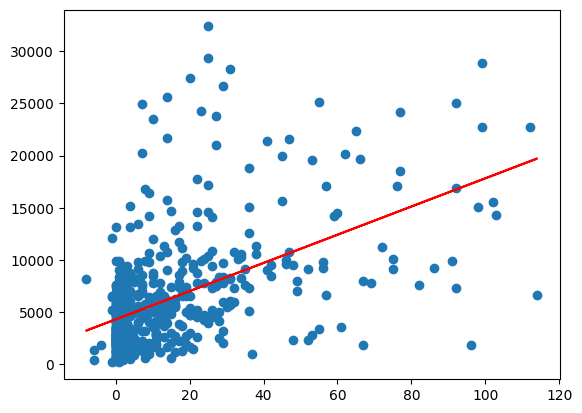

In [39]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 4289.9454 + 135.279*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [40]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\Laudry\AppData\Local\Temp\ipykernel_12408\576177224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


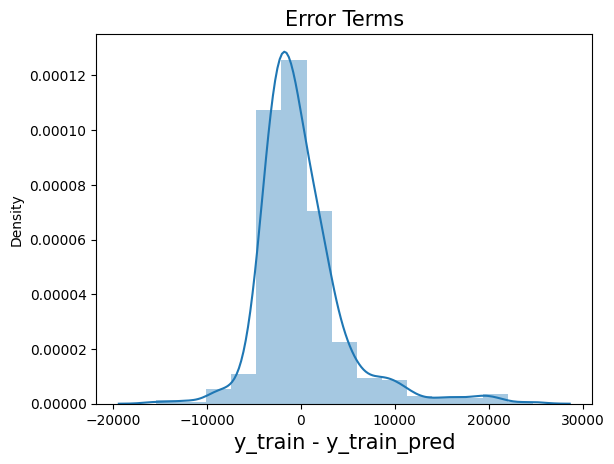

In [41]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

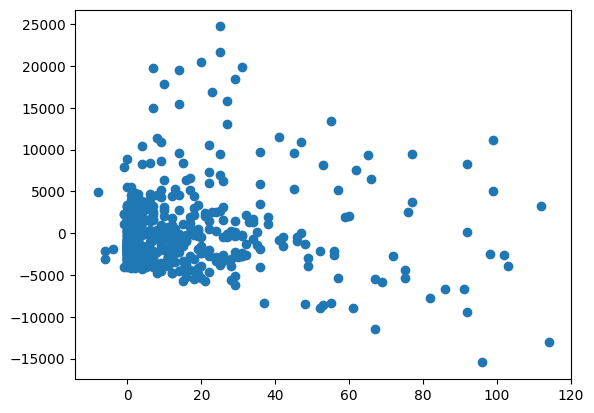

In [42]:
plt.scatter(X_train,res)
plt.show()

In [43]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

577     6319.137060
765     4831.063215
365    14300.624044
428     4966.342656
555     5372.180977
dtype: float64

In [44]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.20030914427530178

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.273 sedangkan dari data testing adalah 0.200. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

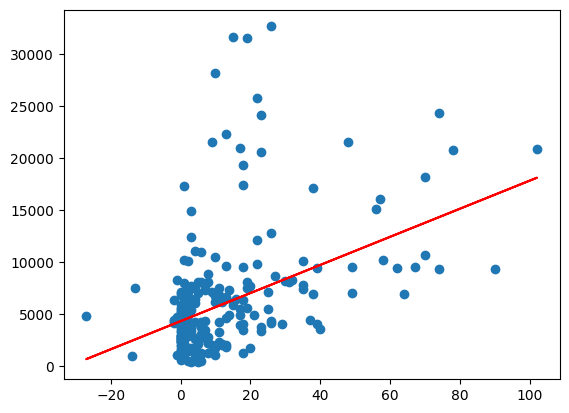

In [45]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()